# Import

In [125]:
%matplotlib inline

import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

sns.set_style("whitegrid")

Change directory to get source code:

In [126]:
main_path = os.getcwd()
parent_path = Path(os.getcwd()).parent
src_path = str(parent_path) + "/src/data"
os.chdir(src_path)

More import:

In [127]:
import change_directory

Change back to notebook directory:

In [128]:
os.chdir(main_path)

# Modeling

## Load data

Change directory to get data:

In [129]:
cd = change_directory.ChangeDirectory()
cd.change_to_data_dir()

Load data:

In [130]:
properties = pd.read_csv("processed/Processed_DC_Properties.csv")

Change back to notebook directory:

In [131]:
cd.change_to_notebook_dir()

## X and y

In [132]:
y_price = properties.PRICE
y_log_price = properties["log(PRICE)"]
X_no_saledate = properties.drop(["PRICE", "SALEDATE", "log(PRICE)"], axis=1)
X_saledate = properties.drop(["PRICE", "log(PRICE)"], axis=1)

## Helper functions

In [133]:
def adjusted_r_squared(r_squared, num_samples, num_regressors):
    return 1 - (((1 - r_squared) * (num_samples - 1)) / (num_samples - num_regressors - 1))

## Baseline model

Our baseline model uses the data without sale dates. Its target variable is price.

In [134]:
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_no_saledate,
                                                                            y_price,
                                                                            test_size=0.2,
                                                                            random_state=5864)

In [135]:
linreg_price = LinearRegression()
linreg_price.fit(X_train_price, y_train_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Performance on training set:

In [136]:
r2_train_price = linreg_price.score(X_train_price, y_train_price)
r2_train_price

0.7457585918124652

In [137]:
adj_r2_train_price = adjusted_r_squared(r2_train_price, X_train_price.shape[0], X_train_price.shape[1])
adj_r2_train_price

0.7438527959109137

Performance on test set:

In [138]:
r2_test_price = linreg_price.score(X_test_price, y_test_price)
r2_test_price

0.6332799676280032

In [139]:
adj_r2_test_price = adjusted_r_squared(r2_test_price, X_test_price.shape[0], X_test_price.shape[1])
adj_r2_test_price

0.6220304608595382

Overfitting!

In [140]:
y_test_price_pred = linreg_price.predict(X_test_price)

In [141]:
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test_price, y_test_price_pred)))

Root mean squared error: 326337.61


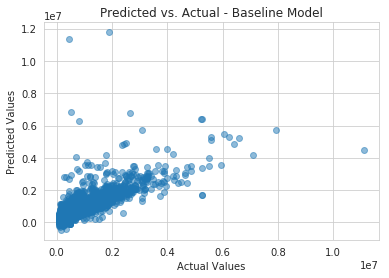

In [142]:
plt.scatter(y_test_price, y_test_price_pred, alpha=0.5)
plt.title("Predicted vs. Actual - Baseline Model")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

## Model 1

Our model 1 uses the data without sale dates. Its target variable is log(price).

In [143]:
X_train_log_price, X_test_log_price, y_train_log_price, y_test_log_price = train_test_split(X_no_saledate,
                                                                                            y_log_price,
                                                                                            test_size=0.2,
                                                                                            random_state=4865)

In [144]:
linreg_log_price = LinearRegression()
linreg_log_price.fit(X_train_log_price, y_train_log_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Performance on training set:

In [145]:
r2_train_log_price = linreg_log_price.score(X_train_log_price, y_train_log_price)
r2_train_log_price

0.7507163445068835

In [146]:
adj_r2_train_log_price = adjusted_r_squared(r2_train_log_price, X_train_log_price.shape[0],
                                            X_train_log_price.shape[1])
adj_r2_train_log_price

0.7488477119644925

Performance on test set:

In [147]:
r2_test_log_price = linreg_log_price.score(X_test_log_price, y_test_log_price)
r2_test_log_price

0.7391205440636678

In [148]:
adj_r2_test_log_price = adjusted_r_squared(r2_test_log_price, X_test_log_price.shape[0],
                                           X_test_log_price.shape[1])
adj_r2_test_log_price

0.731117803699781

Good!

In [149]:
y_test_log_price_pred = linreg_log_price.predict(X_test_log_price)

In [150]:
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test_log_price, y_test_log_price_pred)))

Root mean squared error: 0.38


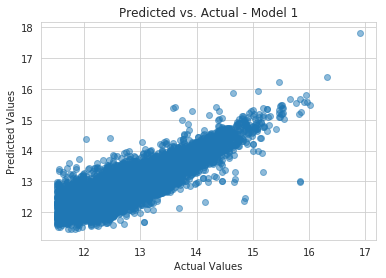

In [151]:
plt.scatter(y_test_log_price, y_test_log_price_pred, alpha=0.5)
plt.title("Predicted vs. Actual - Model 1")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

## Model 2
(our best model: simple and well-performed)

Our model 2 uses the data with sale dates. Its target variable is log(price).

In [152]:
X_saledate.SALEDATE = X_saledate.SALEDATE.apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
today = datetime.strptime("2019-07-30", "%Y-%m-%d")
X_saledate["SOLDDAYS"] = X_saledate.SALEDATE.apply(lambda x: (today - x).days)
X_SALEDATE = X_saledate.SALEDATE
#X_saledate.drop("SALEDATE", axis=1, inplace=True)

In [155]:
X_train_log_price_saledate, X_test_log_price_saledate, y_train_log_price_saledate, y_test_log_price_saledate = train_test_split(X_saledate,
                                                                                                                y_log_price,
                                                                                                                test_size=0.2,
                                                                                                                random_state=756413)

In [156]:
X_saledate.drop("SALEDATE", axis=1, inplace=True)

In [157]:
X_train_log_price_sale, X_test_log_price_sale, y_train_log_price_sale, y_test_log_price_sale = train_test_split(X_saledate,
                                                                                                                y_log_price,
                                                                                                                test_size=0.2,
                                                                                                                random_state=756413)

In [158]:
linreg_log_price_sale = LinearRegression()
linreg_log_price_sale.fit(X_train_log_price_sale, y_train_log_price_sale)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Performance on training set:

In [159]:
r2_train_log_price_sale = linreg_log_price_sale.score(X_train_log_price_sale, y_train_log_price_sale)
r2_train_log_price_sale

0.8581187524888514

In [160]:
adj_r2_train_log_price_sale = adjusted_r_squared(r2_train_log_price_sale, X_train_log_price_sale.shape[0],
                                                 X_train_log_price_sale.shape[1])
adj_r2_train_log_price_sale

0.8570519021477954

Performance on test set:

In [161]:
r2_test_log_price_sale = linreg_log_price_sale.score(X_test_log_price_sale, y_test_log_price_sale)
r2_test_log_price_sale

0.8544410620128413

In [162]:
adj_r2_test_log_price_sale = adjusted_r_squared(r2_test_log_price_sale, X_test_log_price_sale.shape[0],
                                                X_test_log_price_sale.shape[1])
adj_r2_test_log_price_sale

0.8499616893354598

Good!

In [163]:
y_test_log_price_sale_pred = linreg_log_price_sale.predict(X_test_log_price_sale)

In [164]:
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test_log_price_sale,
                                                                   y_test_log_price_sale_pred)))

Root mean squared error: 0.28


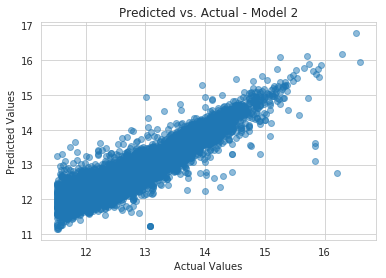

In [165]:
plt.scatter(y_test_log_price_sale, y_test_log_price_sale_pred, alpha=0.5)
plt.title("Predicted vs. Actual - Model 2")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

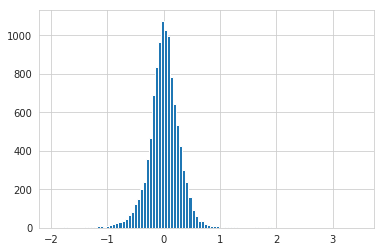

In [166]:
res = y_test_log_price_sale - y_test_log_price_sale_pred
res.hist(bins=100)

In [167]:
len(res)

10887

In [170]:
len(X_test_log_price_saledate)

10887

In [172]:
res.head()

11680   -0.264744
3847     0.036232
29172   -0.523554
6175    -0.088837
1064    -0.068136
Name: log(PRICE), dtype: float64

In [189]:
resSaleDate = pd.concat([X_test_log_price_saledate.SALEDATE,res], axis=1)

In [190]:
resSaleDate.head()

,SALEDATE,log(PRICE)
11680,2016-11-22,-0.264744
3847,2013-02-15,0.036232
29172,2001-02-02,-0.523554
6175,2000-10-23,-0.088837
1064,2007-03-13,-0.068136


In [191]:
resSaleDate['month'] = pd.to_datetime(resSaleDate.SALEDATE).map(lambda x: x.month)

In [192]:
resSaleDate['year'] = pd.to_datetime(resSaleDate.SALEDATE).map(lambda x: x.year)

In [193]:
min(resSaleDate.year)

1992

In [194]:
resSaleDate['month_index'] = (resSaleDate.year - min(resSaleDate.year))*12 + resSaleDate.month

In [195]:
min(resSaleDate.month_index)

1

In [196]:
len(resSaleDate)

10887

In [198]:
ts = resSaleDate.groupby('month_index')['log(PRICE)'].mean()

In [199]:
from statsmodels.tsa.seasonal import seasonal_decompose

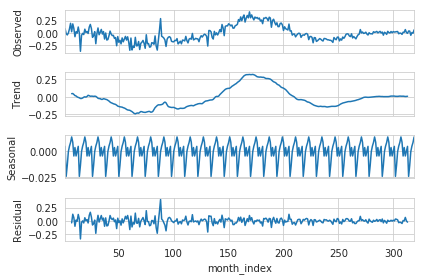

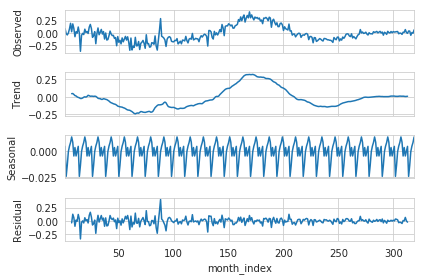

In [201]:
seasonal_decompose(ts, freq=12).plot()

Change directory to get save model:

In [39]:
main_path = os.getcwd()
parent_path = Path(os.getcwd()).parent
src_path = str(parent_path) + "/models"
os.chdir(src_path)

Save model:

In [40]:
with open("linear_regression_model.pickle", "wb") as f:
    pickle.dump(linreg_log_price_sale, f)

Change back to notebook directory:

In [41]:
os.chdir(main_path)

## Model 3

Our model 3 is the LASSO version of model 2.

In [42]:
lasso = LassoCV(alphas=np.arange(0.0001, 1, 0.001), random_state=482, cv=3)
lasso.fit(X_train_log_price_sale, y_train_log_price_sale)

LassoCV(alphas=array([1.000e-04, 1.100e-03, ..., 9.981e-01, 9.991e-01]),
    copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=482, selection='cyclic', tol=0.0001,
    verbose=False)

Performance on training set:

In [43]:
print(lasso.score(X_train_log_price_sale, y_train_log_price_sale))
print(adjusted_r_squared(lasso.score(X_train_log_price_sale, y_train_log_price_sale),
                         X_train_log_price_sale.shape[0], X_train_log_price_sale.shape[1]))

0.855532160414642
0.8544458606630053


Performance on test set:

In [44]:
print(lasso.score(X_test_log_price_sale, y_test_log_price_sale))
print(adjusted_r_squared(lasso.score(X_test_log_price_sale, y_test_log_price_sale),
                         X_test_log_price_sale.shape[0], X_test_log_price_sale.shape[1]))

0.8540735684544328
0.8495828866769204


Good!

In [45]:
y_test_lasso = lasso.predict(X_test_log_price_sale)

In [46]:
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test_log_price_sale,
                                                                   y_test_lasso)))

Root mean squared error: 0.28


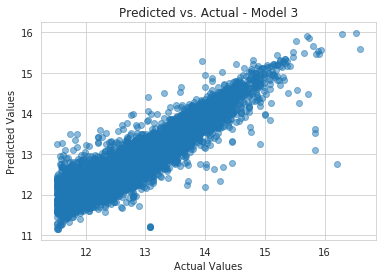

In [47]:
plt.scatter(y_test_log_price_sale, y_test_lasso, alpha=0.5)
plt.title("Predicted vs. Actual - Model 3")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

## Model 4

Our model 4 is the Ridge version of model 2.

In [48]:
ridge = RidgeCV(alphas=np.arange(0.0001, 1, 0.001), cv=3)
ridge.fit(X_train_log_price_sale, y_train_log_price_sale)

RidgeCV(alphas=array([1.000e-04, 1.100e-03, ..., 9.981e-01, 9.991e-01]), cv=3,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

Performance on training set:

In [49]:
print(ridge.score(X_train_log_price_sale, y_train_log_price_sale))
print(adjusted_r_squared(ridge.score(X_train_log_price_sale, y_train_log_price_sale),
                         X_train_log_price_sale.shape[0], X_train_log_price_sale.shape[1]))

0.8579310741079752
0.8568628125533293


Performance on test set:

In [50]:
print(ridge.score(X_test_log_price_sale, y_test_log_price_sale))
print(adjusted_r_squared(ridge.score(X_test_log_price_sale, y_test_log_price_sale),
                         X_test_log_price_sale.shape[0], X_test_log_price_sale.shape[1]))

0.85478368330842
0.8503148543220775


Good!

In [51]:
y_test_ridge = ridge.predict(X_test_log_price_sale)

In [52]:
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test_log_price_sale,
                                                                   y_test_ridge)))

Root mean squared error: 0.28


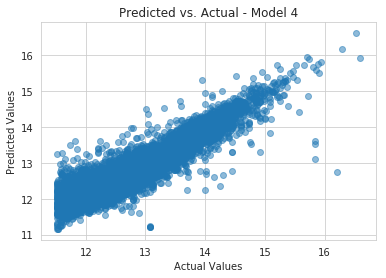

In [53]:
plt.scatter(y_test_log_price_sale, y_test_ridge, alpha=0.5)
plt.title("Predicted vs. Actual - Model 4")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [55]:
MPLUS = y_price > 1000000

In [58]:
X_no_saledate.head()

,AYB,EYB,GBA,LANDAREA,LATITUDE,LONGITUDE,STYLE_1.5 Story Fin,STYLE_1.5 Story Unfin,STYLE_2 Story,STYLE_2.5 Story Fin,...,WARD_Ward 2,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW
0,1910.0,1972,2522.0,1680,38.914680,-77.040832,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,1910.0,1984,2522.0,1680,38.914684,-77.040678,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1900.0,1984,2484.0,1680,38.914683,-77.040629,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,1913.0,1972,5344.0,2196,38.914331,-77.039715,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1906.0,1972,2401.0,1627,38.915408,-77.040129,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [59]:
X_saledate.head()

,AYB,EYB,GBA,LANDAREA,LATITUDE,LONGITUDE,STYLE_1.5 Story Fin,STYLE_1.5 Story Unfin,STYLE_2 Story,STYLE_2.5 Story Fin,...,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW,SOLDDAYS
0,1910.0,1972,2522.0,1680,38.914680,-77.040832,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5726
1,1910.0,1984,2522.0,1680,38.914684,-77.040678,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1134
2,1900.0,1984,2484.0,1680,38.914683,-77.040629,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4766
3,1913.0,1972,5344.0,2196,38.914331,-77.039715,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3441
4,1906.0,1972,2401.0,1627,38.915408,-77.040129,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2861


In [60]:
saledate_features = list(X_saledate.columns)

In [61]:
no_saledate_features = list(X_no_saledate.columns)

In [65]:
saledate_plus = pd.concat([X_saledate, MPLUS], axis=1)

In [66]:
no_saledate_plus = pd.concat([X_no_saledate, MPLUS], axis=1)

In [67]:
len(saledate_features)

325

In [71]:
saledate_plus.PRICE.head()

0    True
1    True
2    True
3    True
4    True
Name: PRICE, dtype: bool

In [72]:
f = open("SaleDateHouses.pkl","wb")
pickle.dump(saledate_plus,f)
pickle.dump(saledate_features,f)
pickle.dump('PRICE',f)
f.close()

In [73]:
f = open("NoSaleDateHouses.pkl","wb")
pickle.dump(no_saledate_plus,f)
pickle.dump(no_saledate_features,f)
pickle.dump('PRICE',f)
f.close()